In [5]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy as st
import numpy as np
from scipy.stats import linregress
import gmaps
from api_keys import gkey


In [8]:
#import vechicle data
vehicle_data = pd.read_csv("Data/vehicle_data.csv.gz",
               compression="gzip")

vehicle_data.head()

,vin,registration_class,zip,model_year,body_type,fuel_type
0,999407G3573,PAS,12866,1976,SUBN,GAS
1,9992313,PAS,13316,1924,CONV,GAS
2,998867,PAS,11501,1952,2DSD,GAS
3,9983692,PAS,10940,1936,2DSD,GAS
4,99782010525,PAS,11225,1978,2DSD,GAS


In [9]:
#import aqi data
aqi_df = pd.read_csv("Data/AQIndex.csv", index_col=0)
aqi_df.head()

,Unnamed: 0.1,zip,AQI,Category Number,Category Name,Pollutant,Year
0,0.0,12032,90,2,Moderate,OZONE,2009
1,1.0,12108,90,2,Moderate,OZONE,2009
2,2.0,12134,90,2,Moderate,OZONE,2009
3,3.0,12139,90,2,Moderate,OZONE,2009
4,4.0,12164,90,2,Moderate,OZONE,2009


In [10]:
#make merged vehicle and aqi data frames for each year
#2009

vehicle_09 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2009]
aqi_group = aqi_df.groupby('Year')
aqi_2009 = aqi_group.get_group(2009)
aqi_2009

vehicle_aqi_09 = pd.merge(aqi_2009, vehicle_09, on=['zip','zip'], how="left" )
vehicle_aqi_09

#2020

vehicle_20 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2020]
aqi_group = aqi_df.groupby('Year')
aqi_2020 = aqi_group.get_group(2020)
aqi_2020

vehicle_aqi_20 = pd.merge(aqi_2020, vehicle_20, on=['zip','zip'], how="left" )
vehicle_aqi_20

#2015

vehicle_15 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2015]
aqi_group = aqi_df.groupby('Year')
aqi_2015 = aqi_group.get_group(2015)
aqi_2015

vehicle_aqi_15 = pd.merge(aqi_2015, vehicle_15, on=['zip','zip'], how="left" )
vehicle_aqi_15.head()

,Unnamed: 0.1,zip,AQI,Category Number,Category Name,Pollutant,Year,vin,registration_class,model_year,body_type,fuel_type
0,2727.0,12032,44,1,Good,OZONE,2015,8T03C193065,PAS,1968.0,CONV,GAS
1,2727.0,12032,44,1,Good,OZONE,2015,8T01C214689,PAS,1968.0,2DSD,GAS
2,2727.0,12032,44,1,Good,OZONE,2015,7T03S242307,PAS,1967.0,CONV,GAS
3,2727.0,12032,44,1,Good,OZONE,2015,6MPCT01Z8P8644612,PAS,1993.0,CONV,GAS
4,2727.0,12032,44,1,Good,OZONE,2015,57548132568,PAS,1962.0,UTIL,GAS


In [6]:
#count how many cars are in zipcode

#2009 zipcode count
cars_per_zip9 = vehicle_aqi_09.groupby('zip').agg({"vin": "count", "AQI": "mean"})
cars_per_zip9 = cars_per_zip9.reset_index()
cars_per_zip9.columns = ['Zipcode', 'Number of Cars', "AQI Mean"]

#2020 zipcode count
cars_per_zip20 = vehicle_aqi_20.groupby('zip').agg({"vin": "count", "AQI": "mean"})
cars_per_zip20 = cars_per_zip20.reset_index()
cars_per_zip20.columns = ['Zipcode', 'Number of Cars', "AQI Mean"]

#2015 zipcode count
cars_per_zip15 = vehicle_aqi_15.groupby('zip').agg({"vin": "count", "AQI": "mean"})
cars_per_zip15 = cars_per_zip15.reset_index()
cars_per_zip15.columns = ['Zipcode', 'Number of Cars', "AQI Mean"]

cars_per_zip9
cars_per_zip15
cars_per_zip20

,Zipcode,Number of Cars,AQI Mean
0,10001,4402,64
1,10002,11137,64
2,10003,5451,64
3,10004,1078,64
4,10005,1029,64
...,...,...,...
1558,14898,797,45
1559,14901,6573,45
1560,14903,5202,45
1561,14904,8161,45


r-value = -0.30908174171411174
r-squared value = 0.09553152306102888


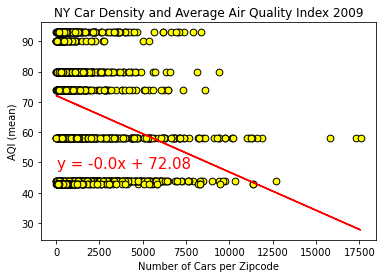

In 2009, there was no correlation between density of cars in a given area and Air Quality Index mean.


In [20]:
#scatter plot for each year
#2009
plt.scatter(cars_per_zip9["Number of Cars"], cars_per_zip9['AQI Mean'], c='yellow', edgecolor='Black', s=45)
plt.xlabel("Number of Cars per Zipcode")
plt.ylabel("AQI (mean)")
plt.title("NY Car Density and Average Air Quality Index 2009")

#plot line regress

(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_per_zip9['Number of Cars'], cars_per_zip9['AQI Mean'])
regress_values = cars_per_zip9['Number of Cars'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cars_per_zip9['Number of Cars'], regress_values, "r-")
plt.annotate(line_eq,(20,48),fontsize=15,color="red")
print(f"r-value = {rvalue}")
print(f"r-squared value = {rvalue**2}")

plt.savefig('Images/DensityScatter2009.png')
plt.show()


print("In 2009, there was no correlation between density of cars in a given area and Air Quality Index mean.")

r-value = -0.057518831079421226
r-squared value = 0.003308415928742993


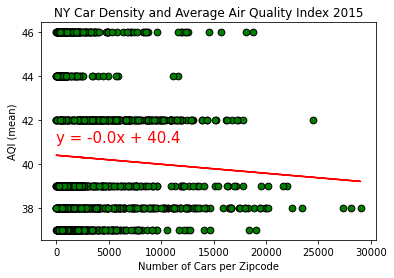

In 2015, there was no correlation between density of cars in a given area and Air Quality Index mean.


In [21]:
#scatter and line regress for 2015

plt.scatter(cars_per_zip15["Number of Cars"], cars_per_zip15['AQI Mean'], c='Green', edgecolor='Black', s=45)
plt.xlabel("Number of Cars per Zipcode")
plt.ylabel("AQI (mean)")
plt.title("NY Car Density and Average Air Quality Index 2015")
plt.show

(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_per_zip15['Number of Cars'], cars_per_zip15['AQI Mean'])
regress_values = cars_per_zip15['Number of Cars'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cars_per_zip15['Number of Cars'], regress_values, "r-")
plt.annotate(line_eq,(10,41),fontsize=15,color="red")
print(f"r-value = {rvalue}")
print(f"r-squared value = {rvalue**2}")

plt.savefig('Images/DensityScatter2015.png')
plt.show()


print("In 2015, there was no correlation between density of cars in a given area and Air Quality Index mean.")

r-value = 0.4244878607333054
r-squared value = 0.1801899439099381


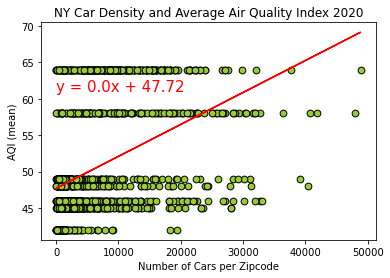

In 2020, there is no correlation between density of cars in a given area and Air Quality Index mean.


In [23]:
#scatter and line regress for 2020
plt.scatter(cars_per_zip20["Number of Cars"], cars_per_zip20['AQI Mean'], c='yellowgreen', edgecolor='Black', s=45)
plt.xlabel("Number of Cars per Zipcode")
plt.ylabel("AQI (mean)")
plt.title("NY Car Density and Average Air Quality Index 2020")


(slope, intercept, rvalue, pvalue, stderr) = linregress(cars_per_zip20['Number of Cars'], cars_per_zip20['AQI Mean'])
regress_values = cars_per_zip20['Number of Cars'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cars_per_zip20['Number of Cars'], regress_values, "r-")
plt.annotate(line_eq,(10,61),fontsize=15,color="red")
print(f"r-value = {rvalue}")
print(f"r-squared value = {rvalue**2}")

plt.savefig('Images/DensityScatter2020.png')

plt.show()

print("In 2020, there is no correlation between density of cars in a given area and Air Quality Index mean.")

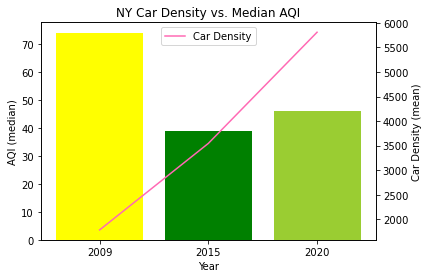

In [22]:
#NY Car Density vs. Median AQI bar chart with line

x= ("2009", "2015", "2020")
y= (cars_per_zip9['AQI Mean'].median(), cars_per_zip15['AQI Mean'].median(), cars_per_zip20['AQI Mean'].median())

fig, ax1 = plt.subplots()
y2= (cars_per_zip9['Number of Cars'].mean(), cars_per_zip15['Number of Cars'].mean(), cars_per_zip20['Number of Cars'].mean())

ax1.bar(x,y, color=['yellow', 'green', 'yellowgreen'])
ax2 = ax1.twinx()
ax2.plot(x, y2, c="HotPink", label="Car Density")
plt.legend(loc="upper center")

ax1.set_xlabel('Year')
ax1.set_ylabel('AQI (median)')
ax2.set_ylabel('Car Density (mean)')

plt.title("NY Car Density vs. Median AQI")

plt.show

plt.savefig('Images/Density_MedianAQI.png')

In [18]:
print("Based on our analysis, there is no correlation between density of cars in a given area and Air Quality Index.")

Based on our analysis, there is no correlation between density of cars in a given area and Air Quality Index.


In [6]:
#Create Heat Maps for Density

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [8]:
#introducing zip code coordinates
zip_df = pd.read_csv('Data/us-zip-code-latitude-and-longitude.csv')
zip_df = zip_df.rename (columns = {"Zip" : "zip"})
zip_df = zip_df.dropna()

vehicle_df = pd.read_csv("Data/vehicle_data.csv.gz", compression="gzip")
vehicle_df = vehicle_df.dropna()

In [11]:
#creating dataframe for car's for selective years
vehicle_year_df_09 = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= 2009]
vehicle_year_df_15 = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= 2015]
vehicle_year_df_20 = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= 2020]

#Merge by zip code coordinates to vehicle age mean dataframe

#2009
vehicle_2009_df = pd.merge(vehicle_year_df_09, zip_df, on=['zip','zip'], how="left")
vehicle_2009_df = vehicle_2009_df.dropna()

#2015
vehicle_2015_df = pd.merge(vehicle_year_df_15, zip_df, on=['zip','zip'], how="left")
vehicle_2015_df = vehicle_2015_df.dropna()

#2020
vehicle_2020_df = pd.merge(vehicle_year_df_20, zip_df, on=['zip','zip'], how="left")
vehicle_2020_df = vehicle_2020_df.dropna()

In [16]:
# find mean of vehicle age by zip code
#2009
veh_number_09_df = vehicle_2009_df.groupby('zip').agg({'vin':'count'})
veh_number_09_df = veh_number_09_df.reset_index()

#2015
veh_number_15_df = vehicle_2015_df.groupby('zip').agg({'vin':'count'})
veh_number_15_df = veh_number_15_df.reset_index()

#2020
veh_number_20_df = vehicle_2020_df.groupby('zip').agg({'vin':'count'})
veh_number_20_df = veh_number_20_df.reset_index()

In [17]:
#add zip code coordinates
#2009
vehicle_09_df = pd.merge(veh_number_09_df, zip_df, on=['zip','zip'], how="left")
vehicle_09_df = vehicle_09_df.dropna()

#2015
vehicle_15_df = pd.merge(veh_number_15_df, zip_df, on=['zip','zip'], how="left")
vehicle_15_df = vehicle_15_df.dropna()

#2020
vehicle_20_df = pd.merge(veh_number_20_df, zip_df, on=['zip','zip'], how="left")
vehicle_20_df = vehicle_20_df.dropna()


In [18]:
#2009 Vehicle Density Heatmap
#Plot Heatmap for vehicle age by zip code
locations = vehicle_09_df[["Latitude", "Longitude"]].astype(float)
vehicle_number = vehicle_09_df["vin"].astype(float)

#create heat layer for vehicle age by zip
heat_layer = gmaps.heatmap_layer(locations, weights=vehicle_number, 
                                  dissipating=False, max_intensity=500,                                  
                                  point_radius=0.05)
fig = gmaps.figure(map_type="HYBRID")
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#2015 Vehicle Density Heatmap
#Plot Heatmap for vehicle age by zip code
locations = vehicle_15_df[["Latitude", "Longitude"]].astype(float)
vehicle_number = vehicle_15_df["vin"].astype(float)

#create heat layer for vehicle age by zip
heat_layer = gmaps.heatmap_layer(locations, weights=vehicle_number, 
                                  dissipating=False, max_intensity=500,                                  
                                  point_radius=0.05)
fig = gmaps.figure(map_type="HYBRID")
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
#2020 Vehicle Density Heatmap
#Plot Heatmap for vehicle age by zip code
locations = vehicle_20_df[["Latitude", "Longitude"]].astype(float)
vehicle_number = vehicle_20_df["vin"].astype(float)

#create heat layer for vehicle age by zip
heat_layer = gmaps.heatmap_layer(locations, weights=vehicle_number, 
                                  dissipating=False, max_intensity=500,                                  
                                  point_radius=0.05)
fig = gmaps.figure(map_type="HYBRID")
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))